In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diverse-tweets/diverse_tweets.csv


In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data = pd.read_csv('/kaggle/input/diverse-tweets/diverse_tweets.csv')
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757 entries, 0 to 5756
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5756 non-null   float64
 1   relid              5756 non-null   object 
 2   year               5757 non-null   object 
 3   active_year        5756 non-null   float64
 4   code_status        5756 non-null   object 
 5   type_of_violence   5756 non-null   float64
 6   conflict_dset_id   5756 non-null   float64
 7   conflict_new_id    5756 non-null   float64
 8   conflict_name      5756 non-null   object 
 9   dyad_dset_id       5756 non-null   float64
 10  dyad_new_id        5756 non-null   float64
 11  dyad_name          5756 non-null   object 
 12  side_a_dset_id     5756 non-null   float64
 13  side_a_new_id      5756 non-null   float64
 14  side_a             5757 non-null   object 
 15  side_b_dset_id     5756 non-null   float64
 16  side_b_new_id      5756 

In [4]:
select_data = ['id','year','type_of_violence','conflict_name','side_a','side_b','number_of_sources','source_article','where_prec','where_description']
data = data[select_data]
data.head()

,id,year,type_of_violence,conflict_name,side_a,side_b,number_of_sources,source_article,where_prec,where_description
0,NaN,#date+year,NaN,NaN,#group+name+first,#group+name+second,NaN,#meta+source,NaN,NaN
1,15960.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1.0,"""All Africa,2009-06-16,Police Deny Shooting Is...",1.0,Maiduguri town
2,15970.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"Reuters 2009-07-27 ""UPDATE 4-Muslim rebels exp...",1.0,Maiduguri town
3,15720.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"AFP 2009-07-27 ""65 dead in religious attacks i...",4.0,Bauchi state
4,15733.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"AFP 2009-07-26 ""Forty-two dead as 'Taliban' se...",1.0,Bauchi town


In [5]:
# Delete first row using iloc
data = data.iloc[1:]
data.head()

,id,year,type_of_violence,conflict_name,side_a,side_b,number_of_sources,source_article,where_prec,where_description
1,15960.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1.0,"""All Africa,2009-06-16,Police Deny Shooting Is...",1.0,Maiduguri town
2,15970.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"Reuters 2009-07-27 ""UPDATE 4-Muslim rebels exp...",1.0,Maiduguri town
3,15720.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"AFP 2009-07-27 ""65 dead in religious attacks i...",4.0,Bauchi state
4,15733.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"AFP 2009-07-26 ""Forty-two dead as 'Taliban' se...",1.0,Bauchi town
5,17161.0,2009,1.0,Nigeria: Government,Government of Nigeria,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,-1.0,"AFP 2009-07-27 ""65 dead in religious attacks i...",4.0,Yobe state


In [6]:
data.isnull().sum()

id                    0
year                  0
type_of_violence      0
conflict_name         0
side_a                0
side_b                0
number_of_sources     0
source_article        0
where_prec            0
where_description    27
dtype: int64

In [7]:
text_column = 'source_article'  # Replace with the actual column name
text = data['source_article'].str.cat(sep=' ')  # Concatenate all text entries
text = text.lower()

In [8]:
from nltk.corpus import stopwords  # Import stopwords from NLTK
import string

stop_words = set(stopwords.words('english') + list(string.punctuation))
text = " ".join([word for word in text.split() if word not in stop_words])

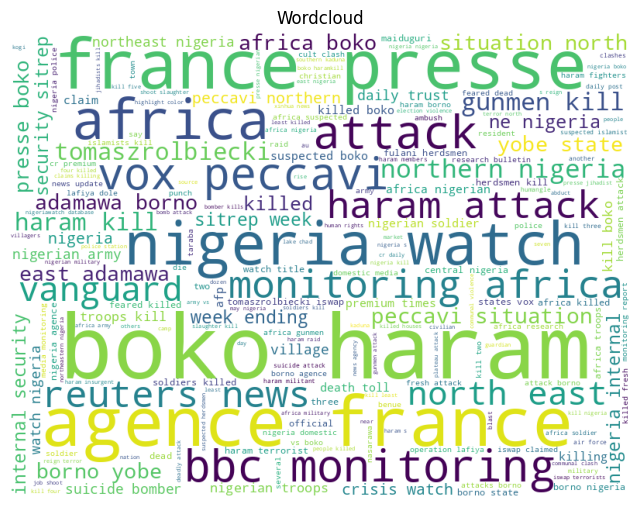

In [9]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=600, background_color="white", stopwords=STOPWORDS).generate(text)

# Display the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud")
plt.show()

In [10]:
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english') + list(string.punctuation))
text = data['source_article'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
score = text.apply(lambda text: analyzer.polarity_scores(text)['compound']) # adding a sentiment score
print(score)

1      -0.3400
2      -0.9081
3      -0.8834
4      -0.8750
5      -0.8834
         ...  
5752   -0.9719
5753   -0.7717
5754   -0.1027
5755   -0.8625
5756   -0.8625
Name: source_article, Length: 5756, dtype: float64


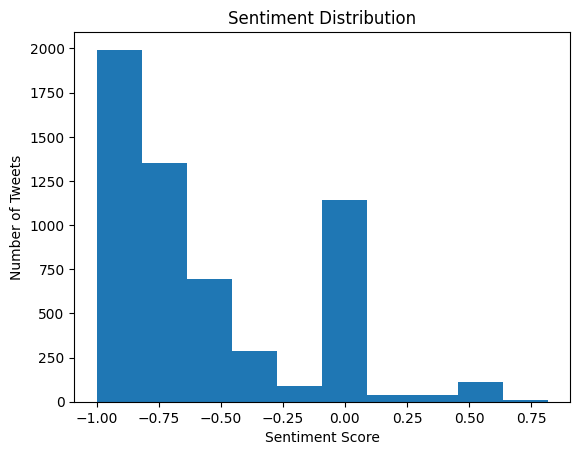

In [14]:
plt.hist(score)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution')
plt.show()